<a href="https://colab.research.google.com/github/tavjo/computer-vision-project/blob/main/SNAI_challenge_YOLO_colab_TVJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2024 Coding Challenge: Automated Object Detection and Counting**
**Author:** Taïsha V. Joseph

**Objective:** Develop a Python-based application that uses computer vision techniques to count and classify different objects from a set of images. The system should be able to differentiate at least three types of objects (e.g., cars, bicycles, pedestrians) in diverse lighting and background conditions.

**Resources:**
- http://cocodataset.org/
- https://github.com/cocodataset/cocoapi/tree/master
- https://github.com/ultralytics/yolov5
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#clearml-logging-and-automation-new
- https://github.com/ultralytics/yolov5/blob/master/tutorial.ipynb

# Download Data

- Get COCO training and validation datasets
- Locally, the zip files can be downloaded and extracted using the Python script *download_data.py*
- In the Google Colab notebook, for faster download, the zip files were stored in my Google Drive and anyone with the links can download the datasets to Google Colab using *gdrive*.
- The code for downloading the datasets from Google Drive or directly from the COCO website can be found in the cells below.

In [1]:
!rm -r /content/sample_data

rm: cannot remove '/content/sample_data': No such file or directory


In [2]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

In [3]:
!mkdir /content/data/
!mkdir /content/data/filtered/
!mkdir /content/data/tmp/

mkdir: cannot create directory ‘/content/data/’: File exists
mkdir: cannot create directory ‘/content/data/filtered/’: File exists


In [4]:
# Helper functions
def generate_direct_download_link(shared_link):
    """
    Generates a direct download link from a shared Google Drive link.

    Args:
        shared_link (str): The shared Google Drive link.

    Returns:
        str: The direct download link or an error message.

    Raises:
        ValueError: If the provided link is not a valid Google Drive shared link.
    """
    try:
        # Check if the shared link is a valid Google Drive link
        if "drive.google.com/file/d/" not in shared_link:
            raise ValueError("The provided link is not a valid Google Drive shared link.")

        # Extract the file ID from the shared link
        file_id = shared_link.split('/d/')[1].split('/')[0]

        # Create the direct download link
        direct_download_link = f"https://drive.google.com/uc?export=download&id={file_id}"
        print (direct_download_link)

        return direct_download_link
    except Exception as e:
        return f"An error occurred: {e}"


In [5]:
val2017 = "https://drive.google.com/file/d/18rji_6JgJYIBfv7EY2PQP3nQA689ZR2I/view?usp=sharing"
train2017 = "https://drive.google.com/file/d/1RgUrTkclcqtT8FVl912XCzX3jIahQwBU/view?usp=sharing"
annotations_trainval2017 = "https://drive.google.com/file/d/10oTb3FBJbWz7ZKjw2G-udamNMCBfYtuF/view?usp=sharing"

In [6]:
# turn shared google drive shared link to direct download link
train2017 = generate_direct_download_link(train2017)
val2017 = generate_direct_download_link(val2017)
annotations_trainval2017 = generate_direct_download_link(annotations_trainval2017)

https://drive.google.com/uc?export=download&id=1RgUrTkclcqtT8FVl912XCzX3jIahQwBU
https://drive.google.com/uc?export=download&id=18rji_6JgJYIBfv7EY2PQP3nQA689ZR2I
https://drive.google.com/uc?export=download&id=10oTb3FBJbWz7ZKjw2G-udamNMCBfYtuF


In [7]:
#export zip data files from google drive
!gdown "$train2017" -O /content/data/tmp/train2017.zip
!gdown "$val2017" -O /content/data/tmp/val2017.zip
!gdown "$annotations_trainval2017" -O /content/data/tmp/annotations_trainval2017.zip

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?export=download&id=1RgUrTkclcqtT8FVl912XCzX3jIahQwBU

but Gdown can't. Please check connections and permissions.
Downloading...
From (original): https://drive.google.com/uc?export=download&id=18rji_6JgJYIBfv7EY2PQP3nQA689ZR2I
From (redirected): https://drive.google.com/uc?export=download&id=18rji_6JgJYIBfv7EY2PQP3nQA689ZR2I&confirm=t&uuid=805502f8-1666-4560-8398-5977dd029f6c
To: /content/data/tmp/val2017.zip
100% 816M/816M [00:18<00:00, 43.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&i

In [16]:
# alternate download method for COCO datasets
#since temporarily, I can't download the train dataset from my google drive, will provide alternative method

# COCO dataset URLs (example URLs, modify as needed)
# train_url = "http://images.cocodataset.org/zips/train2017.zip"
# val_dataset_url = "http://images.cocodataset.org/zips/val2017.zip"
# annotation_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

# import torch
# torch.hub.download_url_to_file(train_url, '/content/data/tmp/train2017.zip')
# torch.hub.download_url_to_file(val_dataset_url, '/content/data/tmp/val2017.zip')
# torch.hub.download_url_to_file(annotation_url, '/content/data/tmp/annotations_trainval2017.zip')


100%|██████████| 18.0G/18.0G [18:32<00:00, 17.4MB/s]


In [9]:
# Extract Data
import os
import zipfile

local_zip = '/content/data/tmp/train2017.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/tmp')
local_zip = '/content/data/tmp/val2017.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/tmp')
local_zip = '/content/data/tmp/annotations_trainval2017.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data/tmp')
zip_ref.close()

## 2.Data Prep

2.1. Filter COCO Annotations
- We'll create a Python script to filter the annotations for the classes person, car, and bicycle.
- In this section, we will update the annotations and copy the relevant images to a new directory.
- *Load the COCO annotations using COCO(input_annotation_file).*

    - Get category IDs for the classes of interest using getCatIds(catNms=categories_to_keep).
    - Get image IDs associated with the filtered categories using getImgIds(catIds=category_ids).

- *Filtering Process:*

    - Iterate over the filtered image IDs.
    - Load image information and corresponding annotations.
    - Append filtered images and annotations to the respective lists.
    - Copy relevant images to the output directory.

- *Saving Filtered Data:*

    - Save the filtered images, annotations, and categories to the output annotation file in COCO format.

In [10]:
import os
import shutil
import json
from pycocotools.coco import COCO

def ensure_dir_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

def filter_coco_annotations(input_annotation_file, output_annotation_file, image_dir, output_image_dir, categories_to_keep):
    coco = COCO(input_annotation_file)
    category_ids = coco.getCatIds(catNms=categories_to_keep)
    image_ids = coco.getImgIds(catIds=category_ids)

    filtered_annotations = []
    filtered_images = []

    ensure_dir_exists(output_image_dir)
    ensure_dir_exists(os.path.dirname(output_annotation_file))

    for img_id in image_ids:
        img_info = coco.loadImgs(img_id)[0]
        ann_ids = coco.getAnnIds(imgIds=img_id, catIds=category_ids)
        anns = coco.loadAnns(ann_ids)

        filtered_images.append(img_info)
        filtered_annotations.extend(anns)

        # Copy image to output directory
        src_img_path = os.path.join(image_dir, img_info['file_name'])
        dst_img_path = os.path.join(output_image_dir, img_info['file_name'])
        shutil.copy(src_img_path, dst_img_path)

    filtered_data = {
        'images': filtered_images,
        'annotations': filtered_annotations,
        'categories': [cat for cat in coco.loadCats(category_ids)]
    }

    with open(output_annotation_file, 'w') as f:
        json.dump(filtered_data, f)

In [12]:
categories_to_keep = ['person', 'car', 'bicycle']

In [18]:
filter_coco_annotations(
    '/content/data/tmp/annotations/instances_train2017.json',
    '/content/data/filtered/annotations/filtered_instances_train2017.json',
    '/content/data/tmp/train2017',
    '/content/data/filtered/images/train2017',
    categories_to_keep
)

loading annotations into memory...
Done (t=17.54s)
creating index...
index created!


In [14]:
filter_coco_annotations(
    '/content/data/tmp/annotations/instances_val2017.json',
    '/content/data/filtered/annotations/filtered_instances_val2017.json',
    '/content/data/tmp/val2017',
    '/content/data/filtered/images/val2017',
    categories_to_keep
)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [9]:
# !rm -r /content/data/tmp

2.2 Convert COCO Annotations to YOLO Format
We need to convert the filtered COCO annotations to YOLO format (i.e., .txt files for each image).

In [19]:
def convert_coco_to_yolo(annotations_file, labels_dir):
    # Load the COCO annotations file
    with open(annotations_file, 'r') as f:
        data = json.load(f)

    # Create a dictionary to map category IDs to category names
    categories = {cat['id']: cat['name'] for cat in data['categories']}

    # Create a dictionary to map category names to YOLO class indices
    category_to_index = {name: index for index, name in enumerate(categories.values())}

    # Ensure the labels directory exists
    os.makedirs(labels_dir, exist_ok=True)

    # Iterate over all annotations in the COCO dataset
    for ann in data['annotations']:
        image_id = ann['image_id']
        category_id = ann['category_id']
        bbox = ann['bbox']
        category_name = categories[category_id]

        # Skip categories that are not in the category_to_index dictionary
        if category_name not in category_to_index:
            continue

        # Get image information to calculate normalized bounding box coordinates
        image_info = next(img for img in data['images'] if img['id'] == image_id)
        image_width = image_info['width']
        image_height = image_info['height']

        # Calculate YOLO format coordinates (normalized)
        x_center = (bbox[0] + bbox[2] / 2) / image_width
        y_center = (bbox[1] + bbox[3] / 2) / image_height
        width = bbox[2] / image_width
        height = bbox[3] / image_height

        # Create the YOLO label string
        yolo_label = f"{category_to_index[category_name]} {x_center} {y_center} {width} {height}\n"

        # Determine the label file path based on the image file name (without extension)
        label_file_path = os.path.join(labels_dir, f"{image_info['file_name'].split('.')[0]}.txt")

        # Append the YOLO label to the label file
        with open(label_file_path, 'a') as label_file:
            label_file.write(yolo_label)

In [21]:
convert_coco_to_yolo(
    '/content/data/filtered/annotations/filtered_instances_train2017.json',
    '/content/data/filtered/labels/train2017'
)

In [22]:
convert_coco_to_yolo(
    '/content/data/filtered/annotations/filtered_instances_val2017.json',
    '/content/data/filtered/labels/val2017'
)

## Train
**2 Options for training a model with YOLOv5:**

- Fine-tune a pre-trained model with pre-exisiting weights
- Train a model from scratch

## **yolov5n architecture:**
### Loss functions:
Classification loss:
  1. Binary Cross-Entropy with Logits Loss (BCEWithLogitsLoss)
  2. FocalLoss (variant of cross-entropy that handles class imbalance) if gamma (focusing param) > 0
Bounding Box regression loss:
  1. Complete Intersection over Union (IoU) loss

### Activation function
- SiLU (Swish) Activation Function (default)

### Hyperparams:

```yaml
# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 3 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]
```

### Train Model (smallest one is yolov5n) from scratch
Should be in *~/Documents/Projects/yolov5/* directory

- Navigate to the models folder in the cloned yolov5 repo
- Modify the "yolov5n.yaml" file by replacing the number of classes from 80 to 3
- Adjust other parameters for each layer of the model as needed. (Let's start with the default parameters)

**Define parameters for training:**

- img 640: Use 640x640 images for training.
- batch 16: Use a batch size of 16.
- epochs 50: Train for 50 epochs.
- data coco_person_car_bicycle.yaml: Use custom data configuration file with fewer classes.
- weights '': Train from scratch (not using any pre-trained weights).
- cfg yolov5n.yaml: Use the configuration file for YOLOv5n (the smallest model). --> "models/yolov5n.yaml"
- device 0: Use the first GPU for training.
--project:Directory where results will be saved.

In [23]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 16605 (delta 50), reused 94 (delta 45), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.27 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (11356/11356), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [24]:
# %pip install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

**Upload data configuration file and place in main directory of yolov5 repo.**
- It should be a .yaml file with the following contents:

```yaml
  # coco_person_car_bicycle.yaml
  # If local
  # train: /Users/taishajoseph/Documents/Projects/computer-vision-project/data/filtered/images/train2017/
  # val: /Users/taishajoseph/Documents/Projects/computer-vision-project/data/filtered/images/val2017/
  # If in Google Colab
  train: /content/data/filtered/images/train2017/
  val: /content/data/filtered/images/val2017/
  test:  # Optional

  # number of classes
  nc: 3

  # class names
  names: ['person', 'car', 'bicycle']
  ```

In [25]:
!cp /content/coco_person_car_bicycle.yaml /content/yolov5/coco_person_car_bicycle.yaml

In [26]:
%cd yolov5

/content/yolov5


In [27]:
!python train.py --img 640 --batch 16 --epochs 50 --data coco_person_car_bicycle.yaml --weights '' --cfg yolov5n_mod.yaml --cache

2024-06-15 00:34:48.673521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 00:34:48.673578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 00:34:48.808047: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=yolov5n_mod.yaml, data=coco_person_car_bicycle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False,

### Visualize Results

Examine performance metrics:

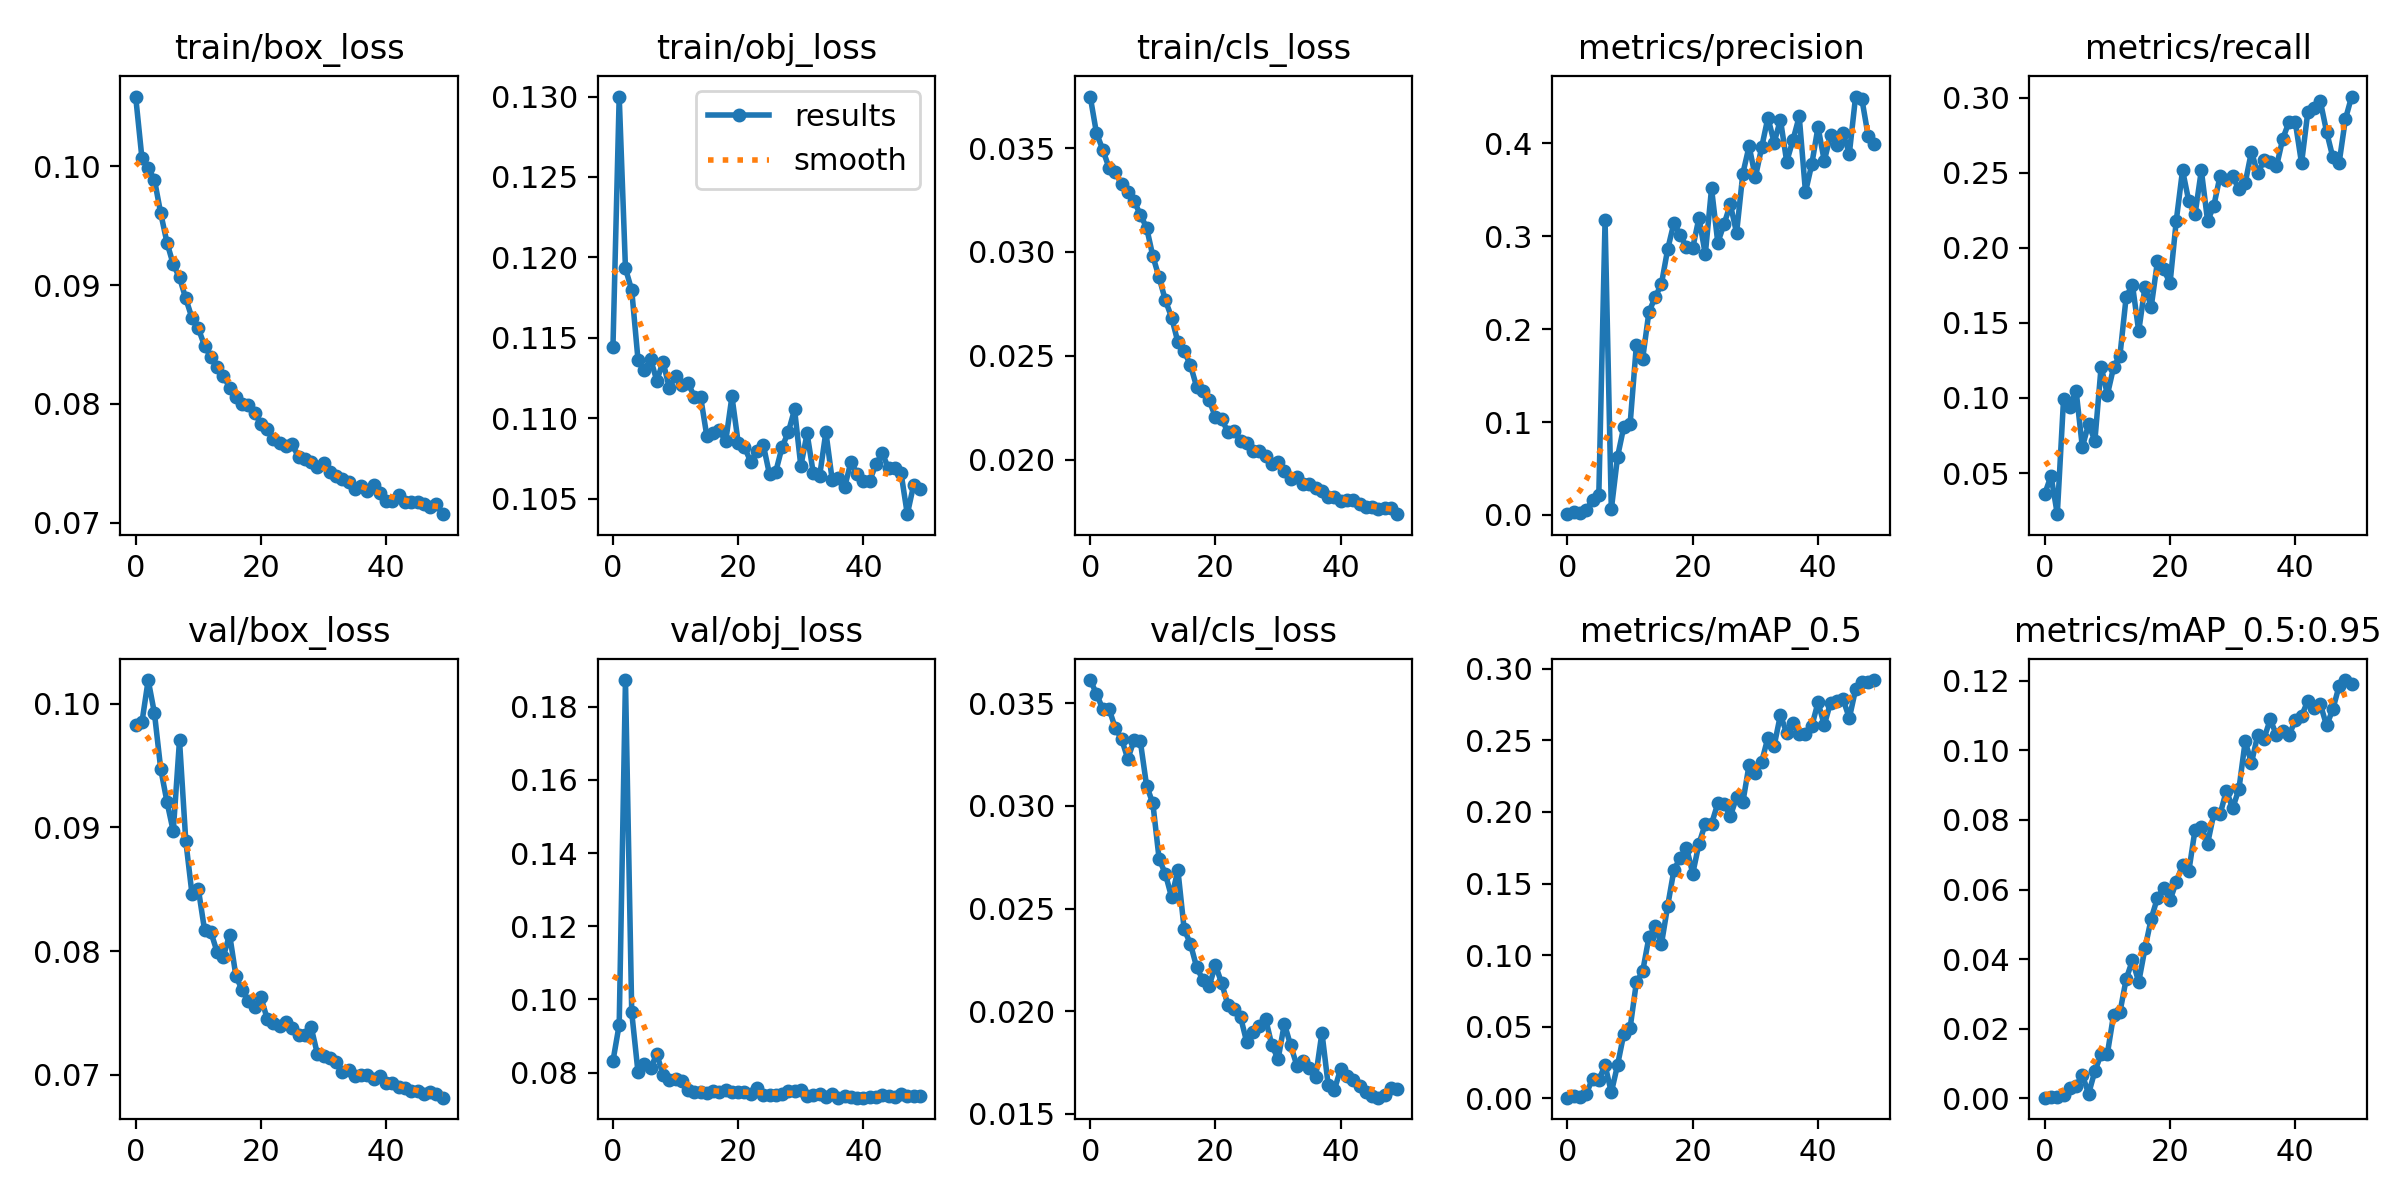

In [31]:
# import matplotlib.pyplot as plt
from IPython.display import Image, display

# Open the image file
display(Image(filename="runs/train/exp/results.png"))

### Export results

In [32]:
import shutil
from google.colab import files

# Step 1: Zip the folder
folder_to_zip = 'runs/train/exp'  # Replace with your folder name
output_filename = '/Users/taishajoseph/Documents/Projects/computer-vision-project/yolov5n/train/runs.zip'  # Replace with your desired zip file name

shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Step 2: Download the zipped folder
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluate

In [34]:
!python val.py --data "coco_person_car_bicycle.yaml" --weights "runs/train/exp/weights/best.pt"

val: data=coco_person_car_bicycle.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5n_mod summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /content/data/filtered/labels/val2017.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:02<00:00,  1.47s/it]
                   all         45        591      0.407      0.286      0.291       0.12
                person         45        323       0.48      0.289      0.309      0.123
                 

### Visualize Results

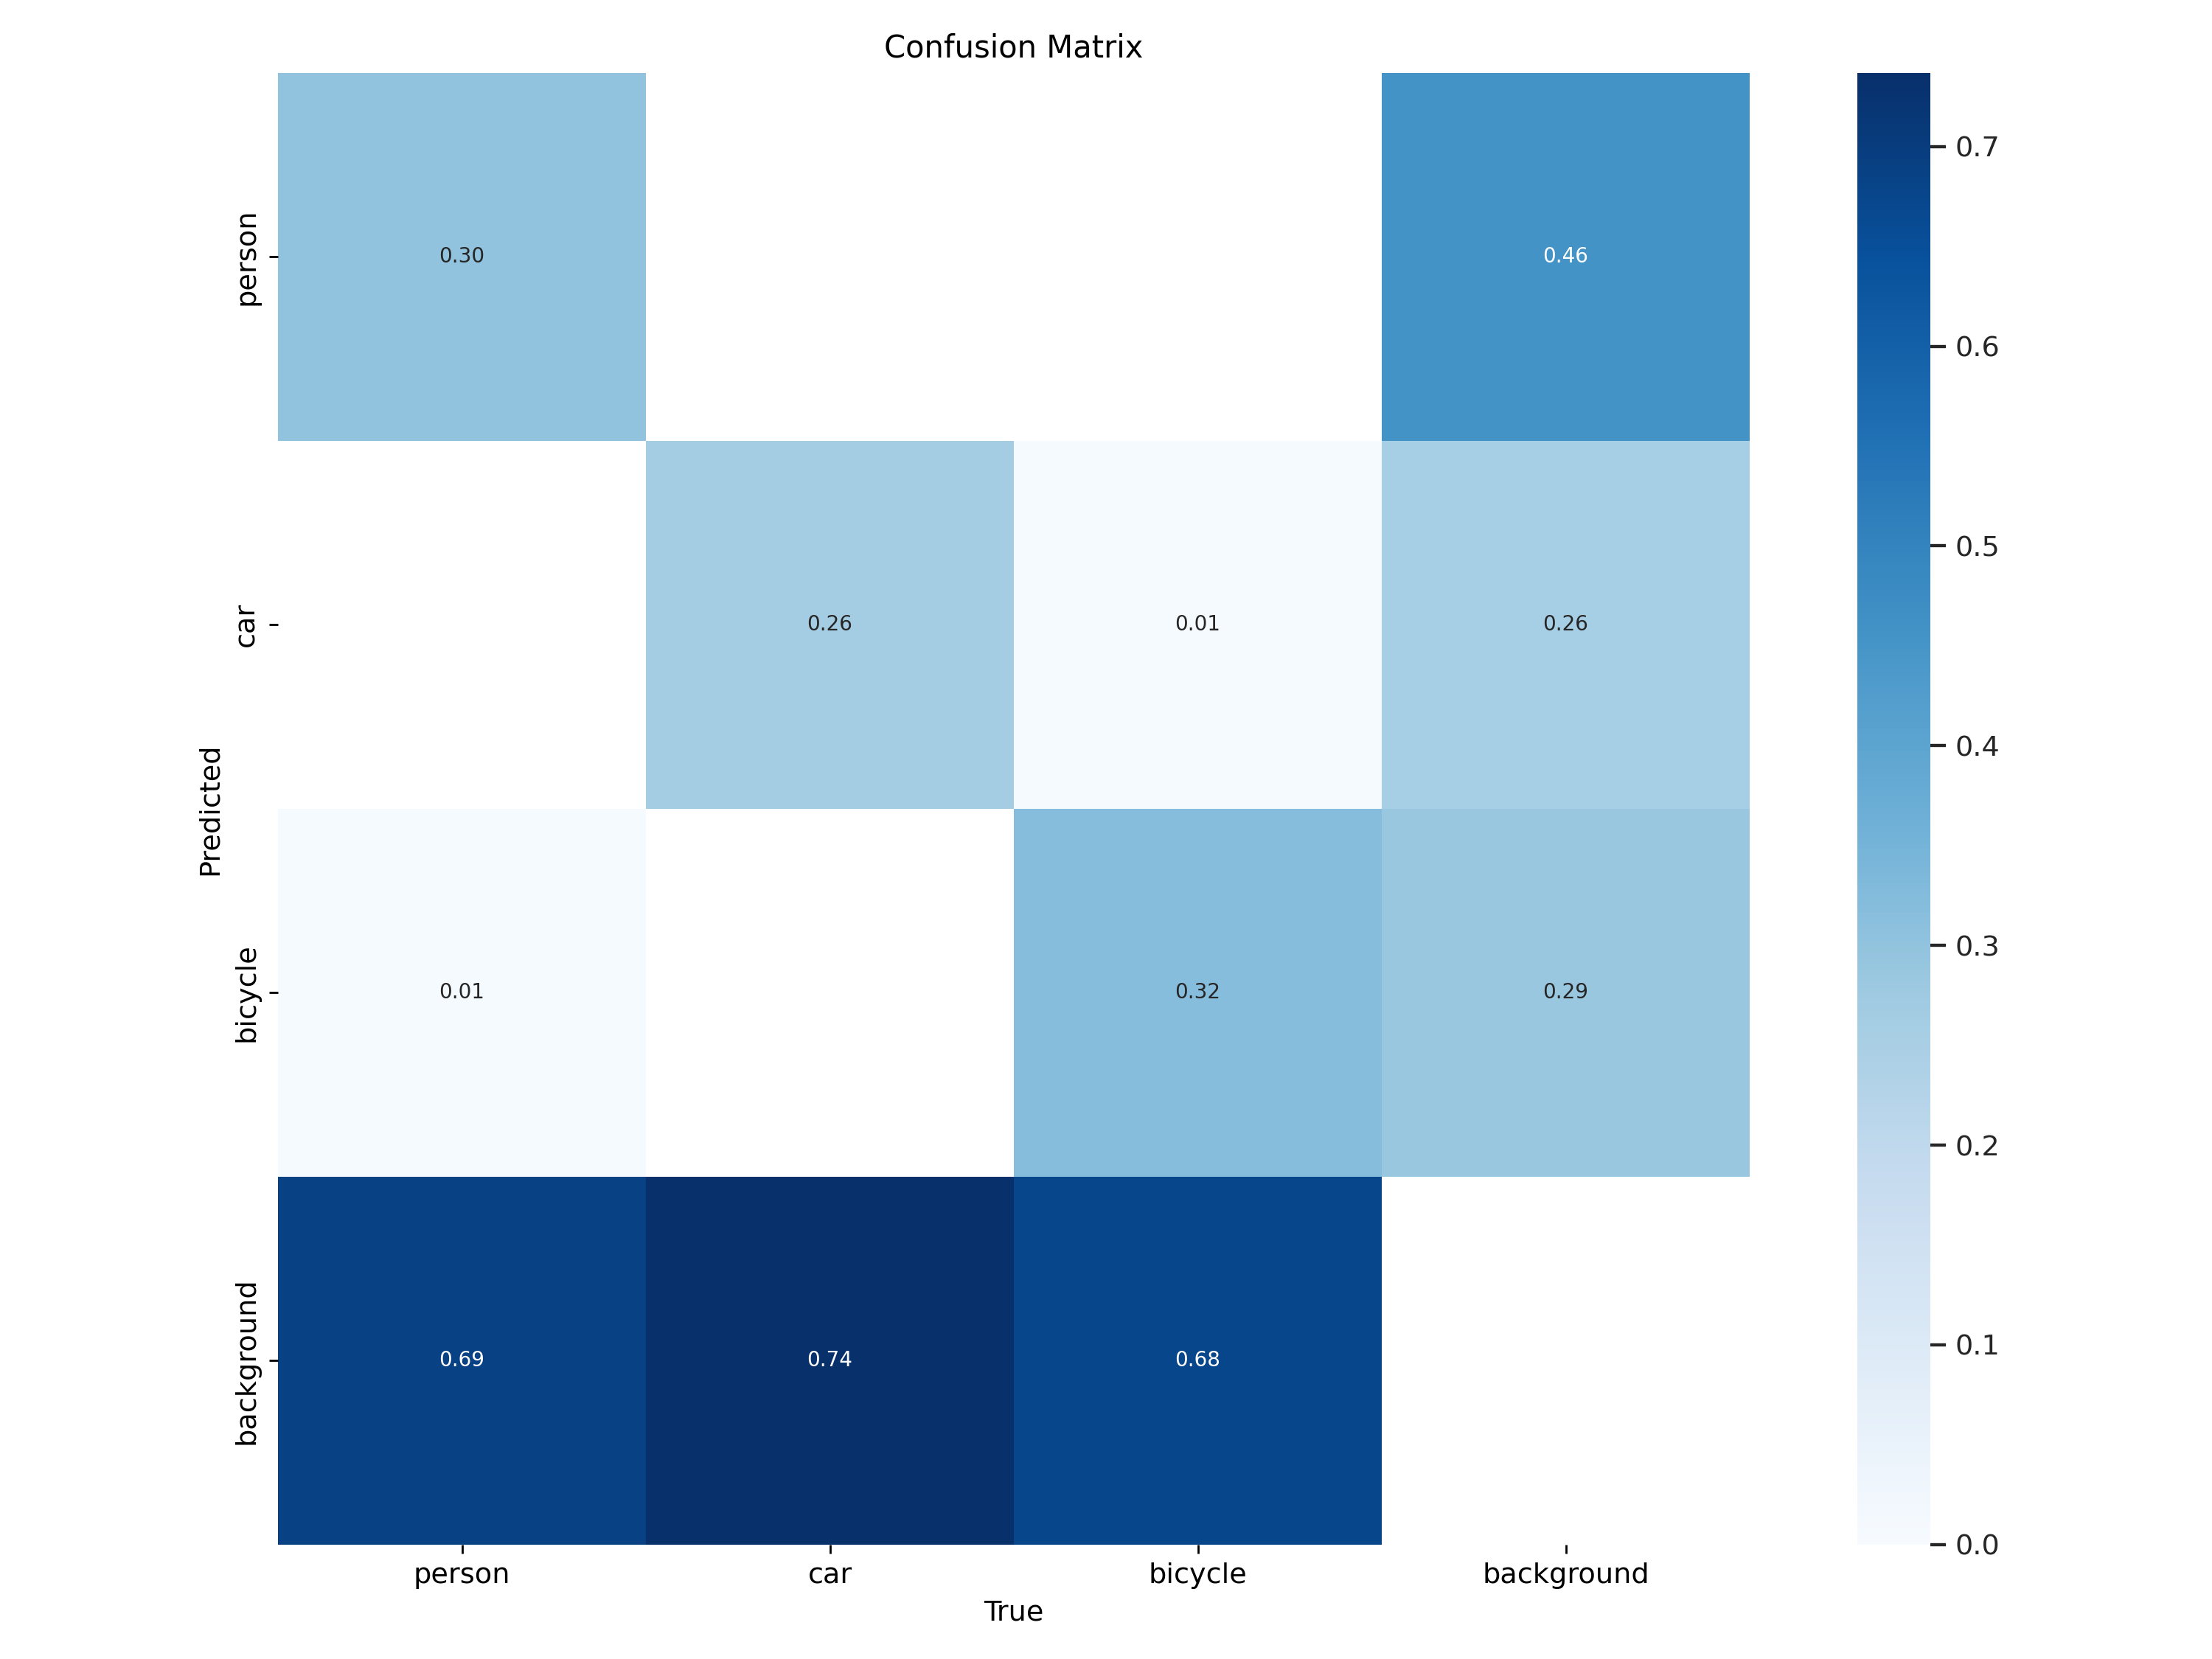

In [35]:
# import matplotlib.pyplot as plt
# from IPython.display import Image, display

# Open the image file
display(Image(filename="runs/val/exp/confusion_matrix.png"))

In [36]:
# import shutil
# from google.colab import files

# Step 1: Zip the folder
folder_to_zip = 'runs/val/exp'  # Replace with your folder name
output_filename = '/Users/taishajoseph/Documents/Projects/computer-vision-project/yolov5n/val/val.zip'  # Replace with your desired zip file name

shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Step 2: Download the zipped folder
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference

In [37]:
!python detect.py --weights "runs/train/exp/weights/best.pt" --img 640 --conf 0.25 --source data/images

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5n_mod summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 2 persons, 1 car, 1 bicycle, 98.8ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 (no detections), 103.5ms
Speed: 0.5ms pre-process, 101.1ms inference, 282.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

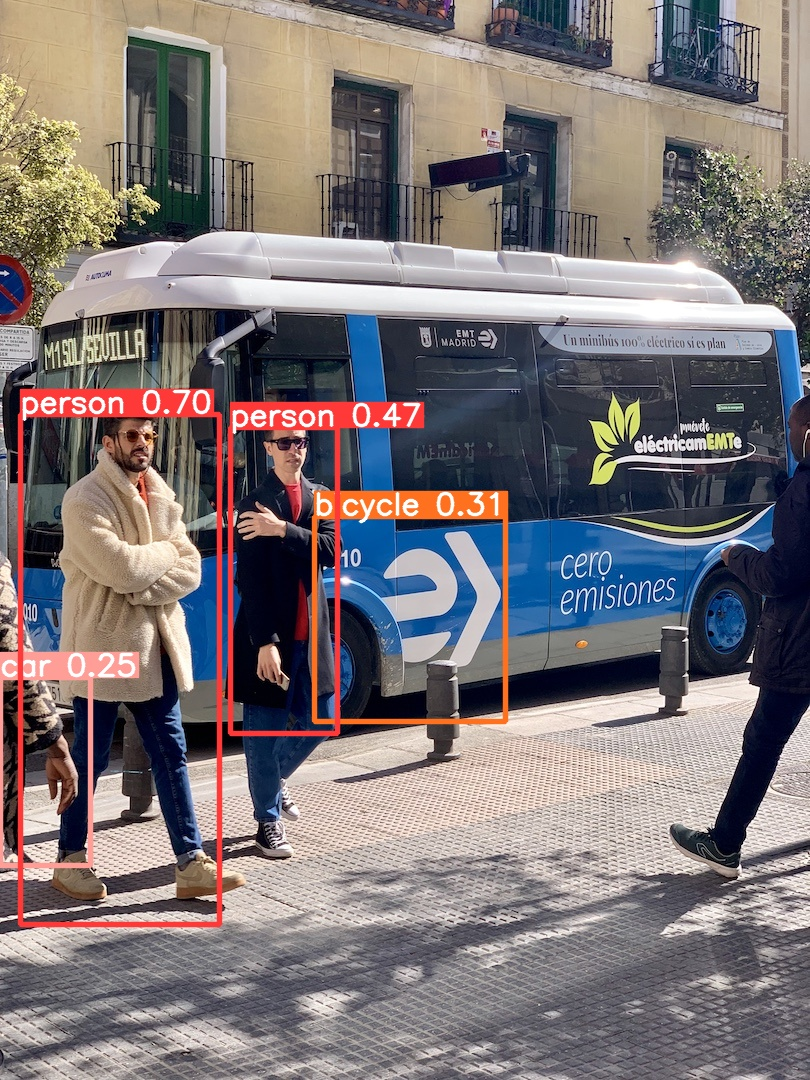

In [40]:
display(Image(filename='runs/detect/exp/bus.jpg', width=600))

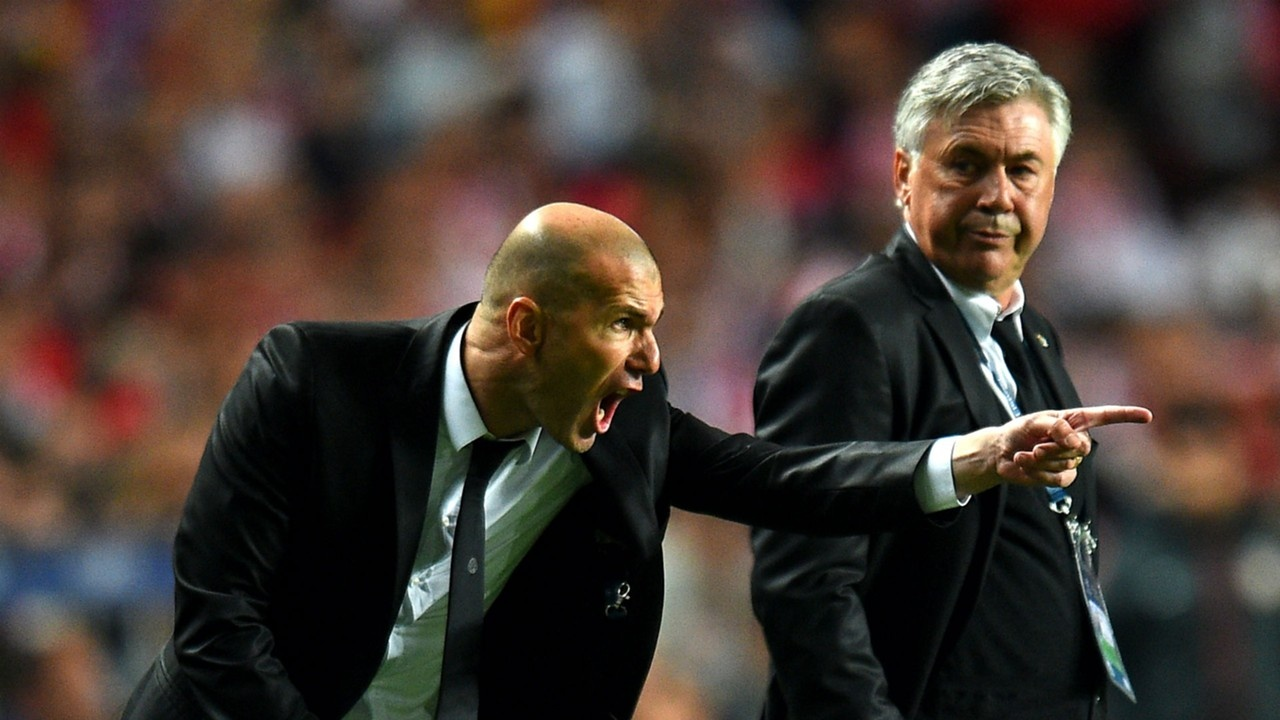

In [39]:
display(Image(filename='runs/detect/exp/zidane.jpg', width=600))

## Clean Up

Terminate the kernel and free memory:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)